## Rain in Australia

### Introduction

Australia is a country that is well-known for its diverse landscapes and weather patterns. One of the most significant weather phenomena that affect the country is rainfall. Rainfall in Australia varies significantly by region and season, making it a crucial factor for various industries, including agriculture, tourism, and infrastructure development.

In this project, we will explore the patterns and trends of rainfall in Australia, analyzing the historical data to understand the variations in rainfall across different regions and seasons. The objective of this project is to provide a comprehensive understanding of rainfall in Australia. We will be predicting if it will rain or no the following day. So our Target Variable is __RainTomorrow__

__Dataset Description__

The dataset in this project is collected from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package). The dataset contains the data of rainfall from 2007 to 2017. It stores the rainfall patterns of various cities of Australia. There are 23 features in the data.

**Columns:**
- __Date:__ The date of observation
- __Location:__ The common name of the location of the weather station
- __MinTemp:__ The minimum temperature in degrees celsius
- __MaxTemp:__ The maximum temperature in degrees celsius
- __Rainfall:__ The amount of rainfall recorded for the day in mm
- __Evaporation:__ The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- __Sunshine:__ The number of hours of bright sunshine in the day.
- __WindGustDir:__ The direction of the strongest wind gust in the 24 hours to midnight
- __WindGustSpeed:__ The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- __WindDir9am:__ Direction of the wind at 9am
- __WindDir3pm:__ Direction of the wind at 3pm
- __WindSpeed9am:__ Wind speed (km/hr) averaged over 10 minutes prior to 9am
- __WindSpeed3pm:__ Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- __Humidity9am:__ Humidity (percent) at 9am
- __Humidity3pm:__ Humidity (percent) at 3pm
- __Pressure9am:__ Atmospheric pressure (hpa) reduced to mean sea level at 9am
- __Pressure3pm:__ Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- __Cloud9am:__ Fraction of sky obscured by cloud at 9am. ***
- __Cloud3pm:__ Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- __Temp9am:__ Temperature (degrees C) at 9am
- __Temp3pm:__ Temperature (degrees C) at 3pm
- __RainToday:__ Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- __RainTomorrow:__ The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".



*** _This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast._

### Import Dataset & Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import mean_squared_error as mse_
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
import missingno  #for missing values graph 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Data
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Understanding Data

In [3]:
#Checking the Columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
#Understanding the Data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
#Checking if there are any Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

__We can observe that there are total _145460_ rows and _23_ columns but some of them have few missing values__ 

### Missing Values
Let's count the missing values in each column and visualize them.

In [6]:
#Finding number of Misssing Values in each column
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

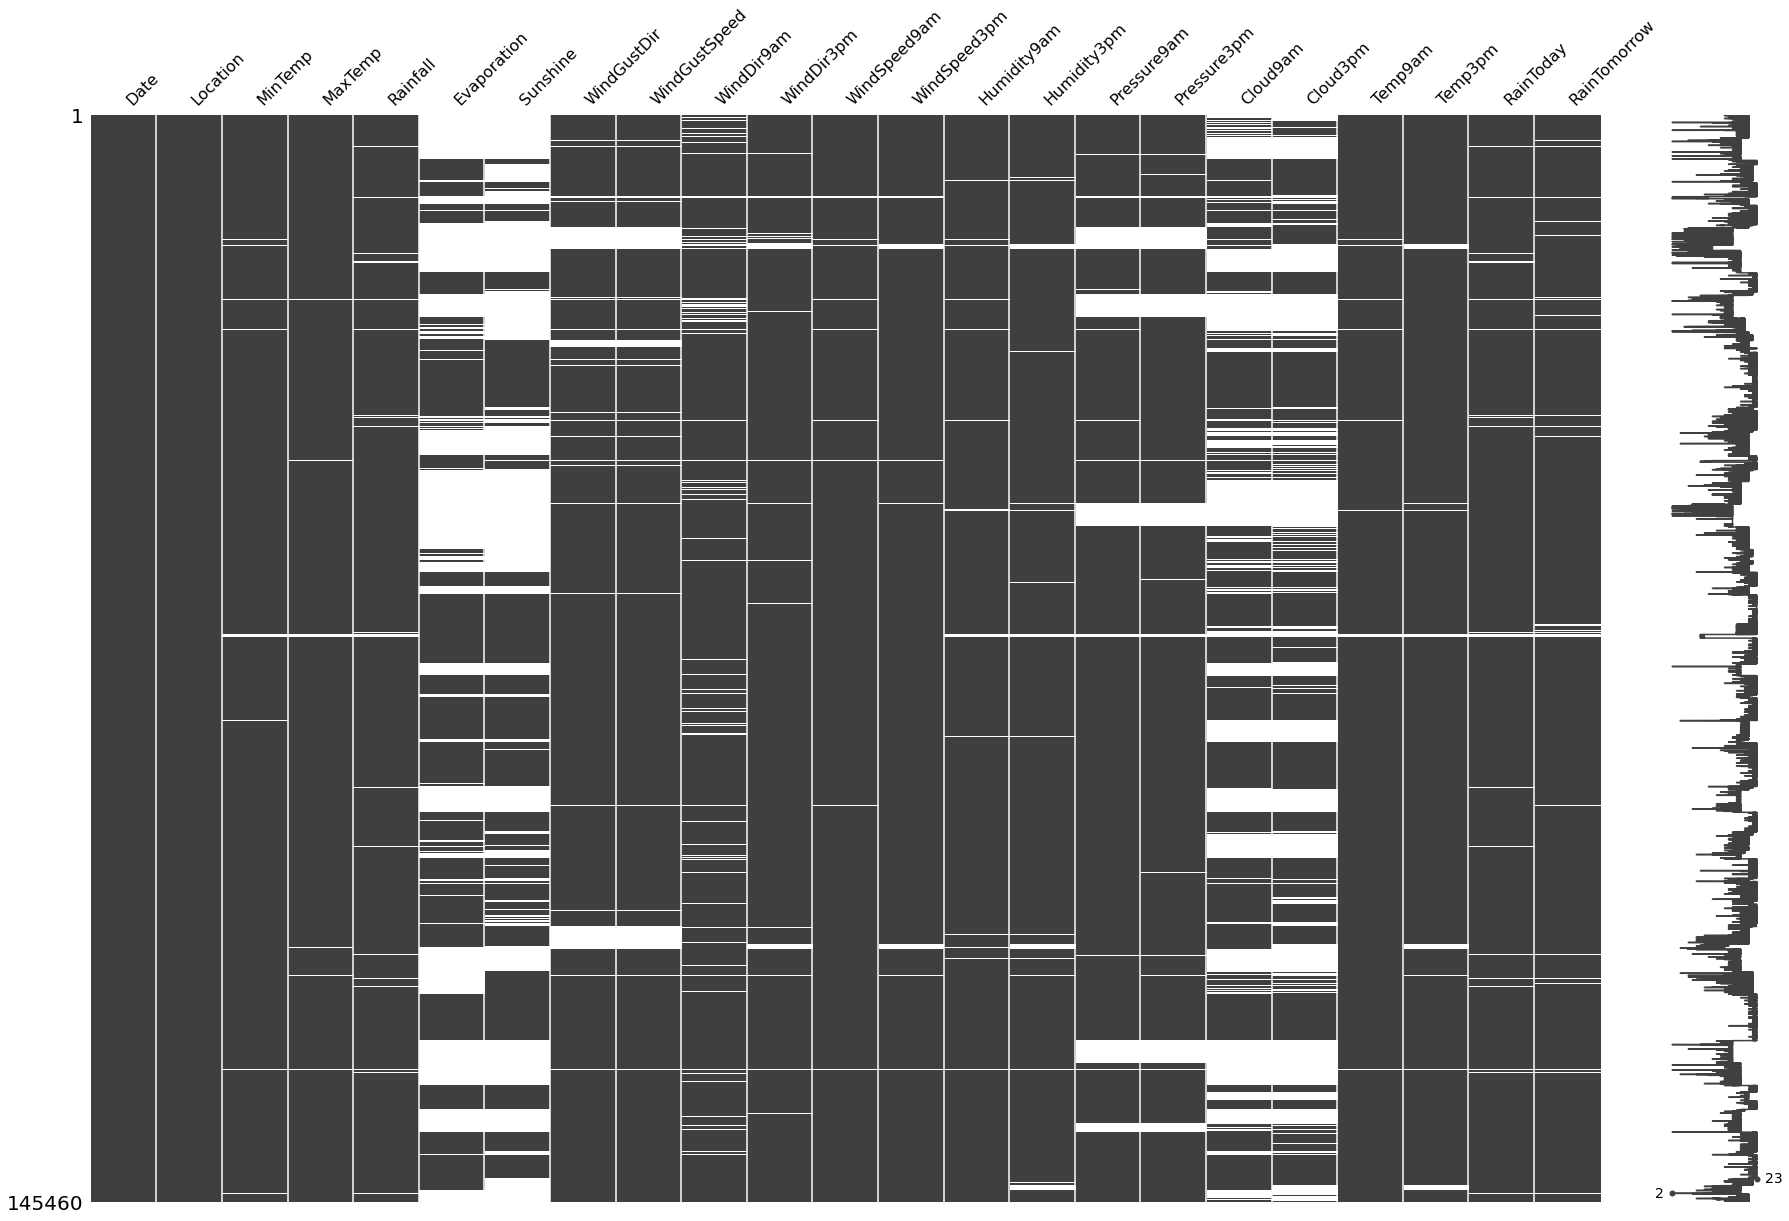

In [7]:
#visualizing missing values in each column
missingno.matrix(data, figsize = (30,20))

__Analysis:__ The white bars / lines are the missing values. Some of the columns have too many white gaps, meaning they have a lot of missing values. Columns like *Date* and *Location* have no missing value at all as they are full however, *Sunshine, Evaporation, Cloud9am* and *Cloud3am* have the most missing values.

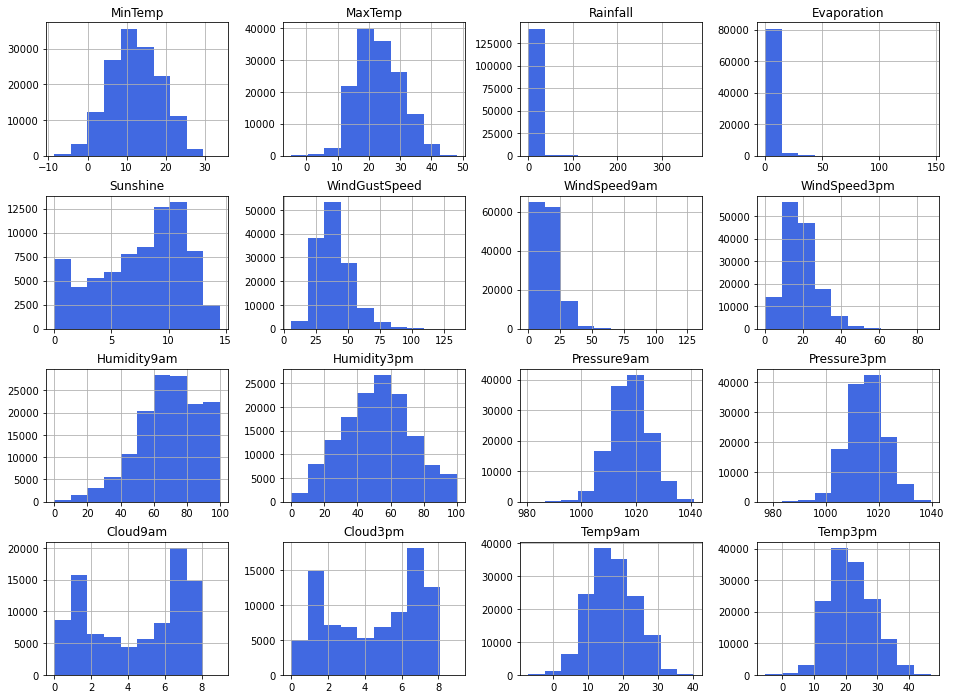

In [8]:
#Plotting each column
data.hist(bins=10 ,figsize=(16,12), color = 'royalblue')
plt.show()

__Analysis:__ To understand each column's distribution we have plotted them individually. However we can notice only some of them are almost normally distributed (like, MinTemp, Humidity3pm, MaxTemp, Temp9am) while others are either right skewed or left skewed. We need to clean the dataset in order to make them normally distributed. 

In [9]:
#copying the data
df = data.copy()
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


### Treating Missing Values
__Treatment:__ We can either treat the missing values by deleting them or we can fill them with the most occured values. Since we have a lot of missing values in certain columns, deleting them won't help us as it would reduce the length of the dataset. So we will fill the data with the median and mode of the columns. 

In [10]:
# Treating missing values
# missing numerical columns replaces with median
def r_num(df):
    for i in df.select_dtypes(['int', 'float']):
        df[i] = df[i].fillna(df[i].median())
    return df

# Replace missing object columns with mode
def r_obj(df):
    for i in df.select_dtypes('object'):
        df[i] = df[i].fillna(method='ffill')
    return df

df = r_num(df)
df = r_obj(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [11]:
#Checking missing values
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

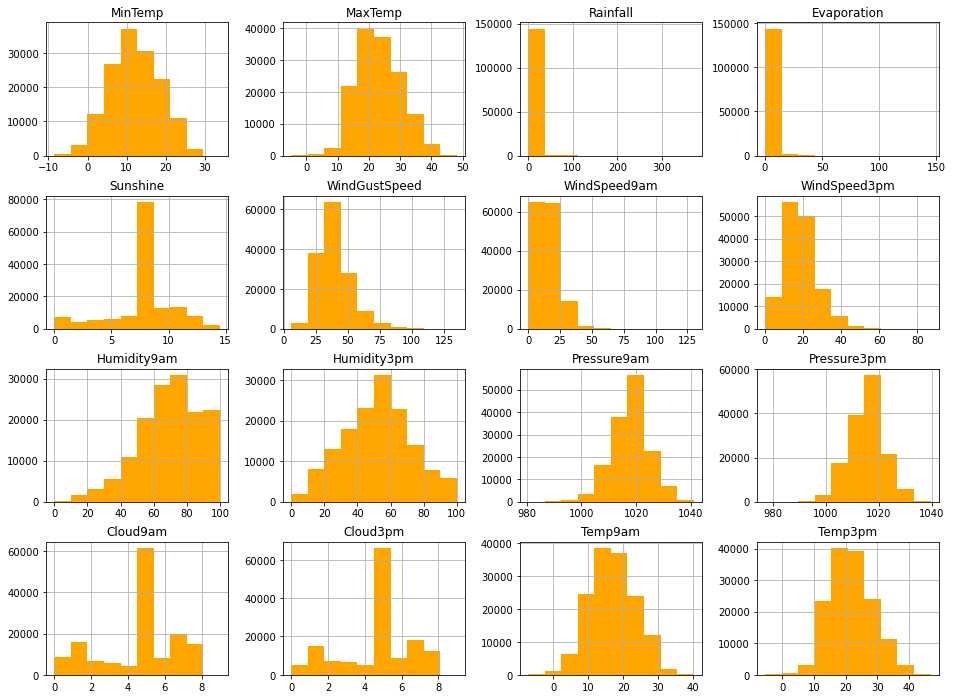

In [12]:
#Checking the distribution of each Column
df.hist(bins=10 ,figsize=(16,12), color = 'orange')
plt.show()

__Analysis:__ Even though we have treated the missing values, our data columns still appear to be the same. This shows that there are few outliers which we will treat later. 

### Correlation between columns

In [13]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733358,0.102339,0.364798,0.032632,0.171899,0.173513,0.173055,-0.231310,0.006111,-0.423299,-0.432824,0.043056,0.000157,0.897829,0.698574
MaxTemp,0.733358,1.000000,-0.073563,0.447289,0.315487,0.066451,0.014389,0.049507,-0.498350,-0.498725,-0.308057,-0.396339,-0.232311,-0.218368,0.879335,0.968332
Rainfall,0.102339,-0.073563,1.000000,-0.041371,-0.168777,0.125109,0.084586,0.055688,0.220661,0.247946,-0.158812,-0.119397,0.164202,0.139380,0.010933,-0.077466
Evaporation,0.364798,0.447289,-0.041371,1.000000,0.279210,0.149942,0.148681,0.101264,-0.384284,-0.293638,-0.213660,-0.233593,-0.169494,-0.160652,0.425712,0.434014
Sunshine,0.032632,0.315487,-0.168777,0.279210,1.000000,-0.031229,-0.012197,0.023176,-0.330031,-0.430357,0.035759,-0.010618,-0.505488,-0.526045,0.191385,0.331676
WindGustSpeed,0.171899,0.066451,0.125109,0.149942,-0.031229,1.000000,0.578744,0.657975,-0.208803,-0.026804,-0.425819,-0.384140,0.046261,0.072894,0.145717,0.032375
WindSpeed9am,0.173513,0.014389,0.084586,0.148681,-0.012197,0.578744,1.000000,0.512279,-0.268196,-0.031079,-0.215107,-0.165124,0.006593,0.028376,0.127491,0.004806
WindSpeed3pm,0.173055,0.049507,0.055688,0.101264,0.023176,0.657975,0.512279,1.000000,-0.143358,0.016275,-0.277277,-0.239274,0.031498,0.010460,0.161040,0.027529
Humidity9am,-0.231310,-0.498350,0.220661,-0.384284,-0.330031,-0.208803,-0.268196,-0.143358,1.000000,0.659290,0.131418,0.175914,0.355815,0.278105,-0.469774,-0.491242
Humidity3pm,0.006111,-0.498725,0.247946,-0.293638,-0.430357,-0.026804,-0.031079,0.016275,0.659290,1.000000,-0.025986,0.048527,0.396914,0.403456,-0.216951,-0.555606


<AxesSubplot:>

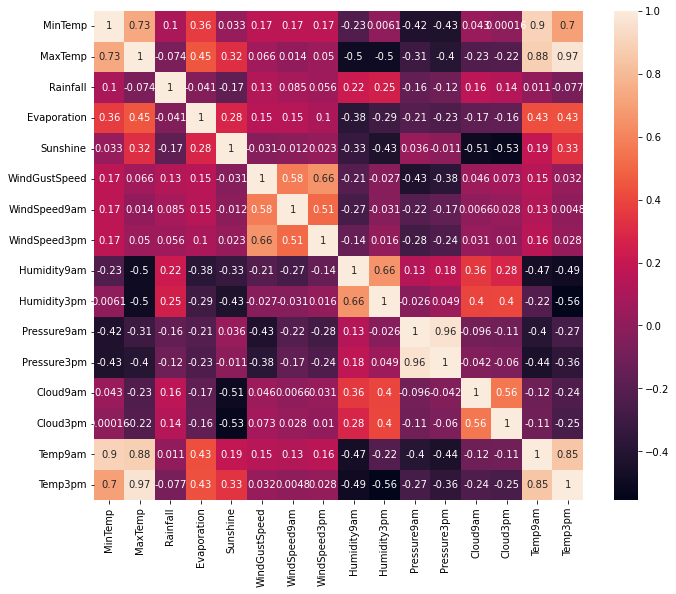

In [14]:
#Correlation
corr = df.corr()
plt.subplots(figsize=(11,9))
sns.heatmap(corr,annot=True, square=True)

__Analysis:__ Certain columns have a positive correlation with other columns while others have negative. The darker columns cells show the negative correlation while the lighter columns show the positive correlation. Since we have to deal with Rainfall column, we will check the correlation of it with other columns.
- __Positive Correlation:__ Humidity3pm, Humidity9am, Cloud9am, Cloud3pm, WindGustSpeed, MinTemp, WindSpeed9am, WindSpeed3pm,    Temp9am 
- __Negative Correlation:__ Evaporation, MaxTemp, Temp3pm, Pressure3pm, Pressure9am, Sunshine 

In [15]:
# extract the correlation coefficients for Rainfall column
rainfall_corr = corr['Rainfall']

# print the correlation coefficients in descending order
print(rainfall_corr.sort_values(ascending=False))

Rainfall         1.000000
Humidity3pm      0.247946
Humidity9am      0.220661
Cloud9am         0.164202
Cloud3pm         0.139380
WindGustSpeed    0.125109
MinTemp          0.102339
WindSpeed9am     0.084586
WindSpeed3pm     0.055688
Temp9am          0.010933
Evaporation     -0.041371
MaxTemp         -0.073563
Temp3pm         -0.077466
Pressure3pm     -0.119397
Pressure9am     -0.158812
Sunshine        -0.168777
Name: Rainfall, dtype: float64


### Location
__Moving on to the Location from the data is collected.__

In [16]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


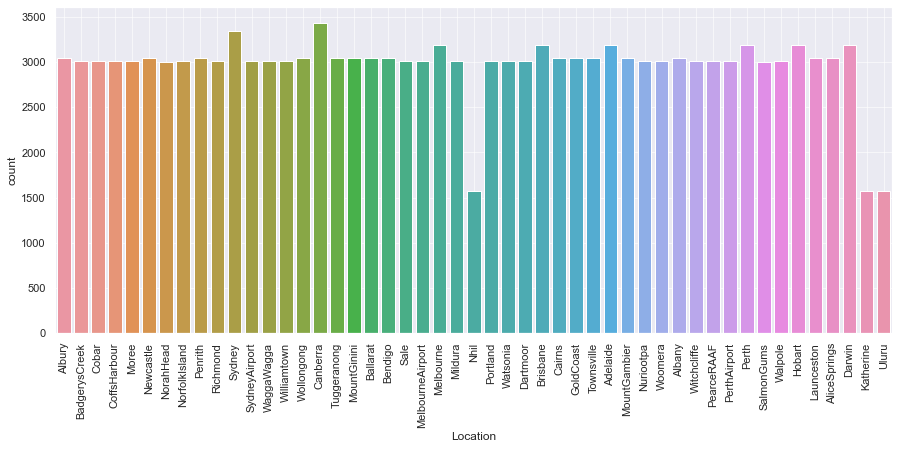

In [17]:
#plotting the location of the data where it is collected from
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(data=df, x="Location")
plt.xticks(rotation=90)
plt.grid(linewidth = 0.6)
plt.show()

__Analysis:__ We can see that the graph shows the count of locations from where the data is collected from. Each location has an input of 3000 datasets while some of them like Nhil, Katherine and Uluru have about 1500 data. Canberra has the most, 3436 data. 

### Wind Direction
__Understanding the Wind direction during the different hours of the day__ 

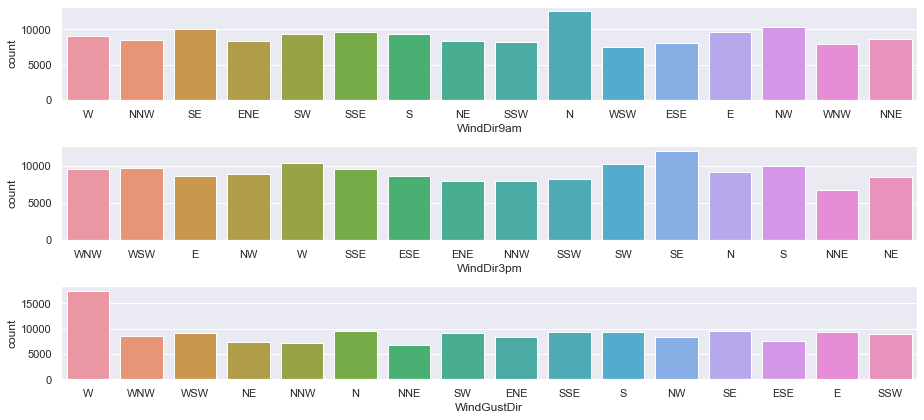

In [18]:
sns.set(rc={'figure.figsize':(13,6)})
fig, ax =plt.subplots(3,1)

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

__Analysis:__ We have 3 graphs showing the wind direction at different times of the day. First at 9 AM , 3 PM and then we have the Wind Gust Direction. 
- At 9 AM the wind direction is mostly in the North and least in the West Southwest. 
- Similarly, the wind at 3pm is mostly in the South East and least in the North Northeast. 
- The Wind Gust Direction is mostly in the West and least in the North Northeast like the 3PM wind

### Rain Today and Tomorrow
__Let's check the count of the Rain Today and Rain Tomorrow columns__

Rain Today Value Count: 
 No     112698
Yes     32762
Name: RainToday, dtype: int64

Rain Tomorrow Value Count: 
 No     112701
Yes     32759
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

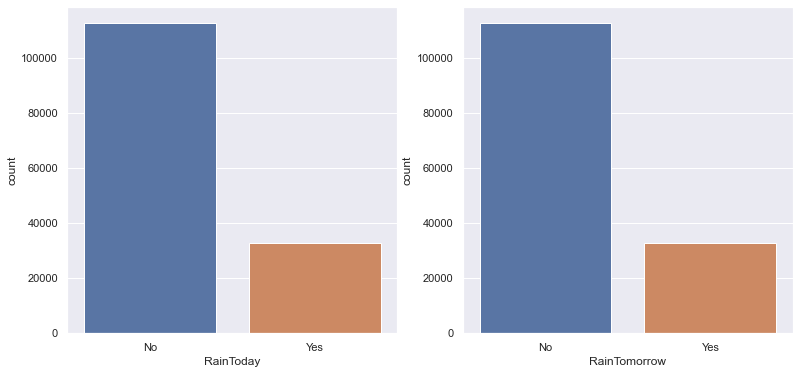

<Figure size 1368x1296 with 0 Axes>

In [19]:
fig, ax =plt.subplots(1,2)
print("Rain Today Value Count: \n", df.RainToday.value_counts())
print("\nRain Tomorrow Value Count: \n",df.RainTomorrow.value_counts())

plt.figure(figsize=(19,18))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

### Rainfall

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 720x576 with 0 Axes>

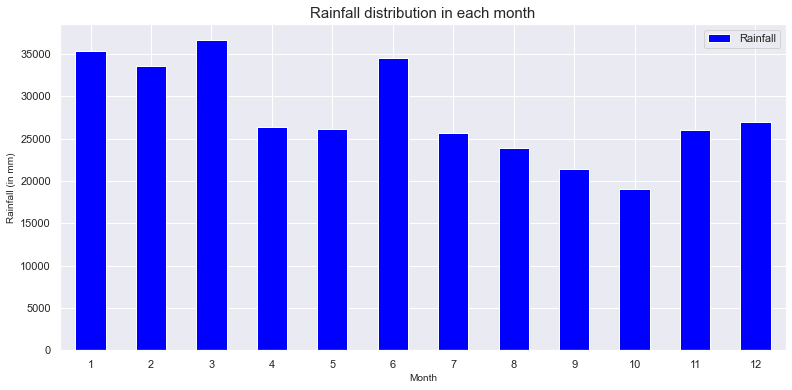

In [20]:
#Rainfall per month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
rainfall =[df['Date'].dt.year, df['Date'].dt.month, df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
a = rainfall_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')
plt.title('Rainfall distribution in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

__Analysis:__ The graph shows rainfall happening each month. We can see that October has the least Rain. However March experiences the most rain throughout the year. It might be because the season changes.

Text(0.5, 1.0, 'Rainfall distribution in each year')

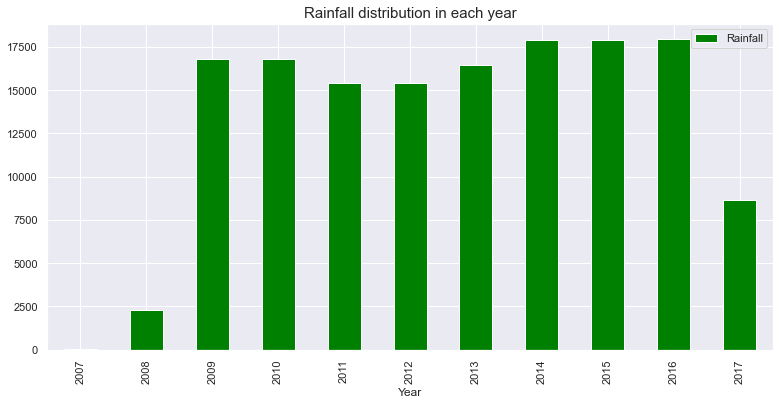

In [21]:
#rainfall per year
a = rainfall_df.groupby('Year').agg({'Rainfall':'count'})
a.plot(kind='bar', color='green')
plt.title('Rainfall distribution in each year', fontsize=15)

__Analysis:__ The graph shows the rain distribusion throughout the year. 2008 appears to be the least rained year that can be because the dataset starts from the middle of the year 2008. We can see that 2014, 2015, 2016 is the most rained years and have almost equal rain counts. 

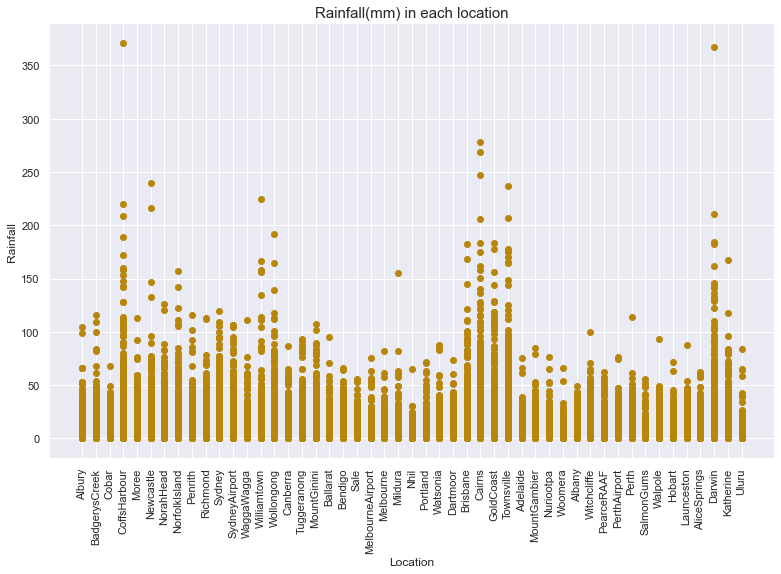

In [22]:
#plotting Rainfall by Location
plt.figure(figsize=(13,8))
plt.scatter(df['Location'],df['Rainfall'], color='darkgoldenrod')
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.title('Rainfall(mm) in each location', fontsize=15)
plt.ylabel("Rainfall")
plt.show()

__Analysis:__ The graph depicts the rainfall in different parts of Australia. It looks like Crains, Brisbane, Townville, Darwin, and CoffsHarbours have experienced more rain as compared to other locations. The driest rain being in Nhil that may be because it has less data

### Dealing with the Outliers

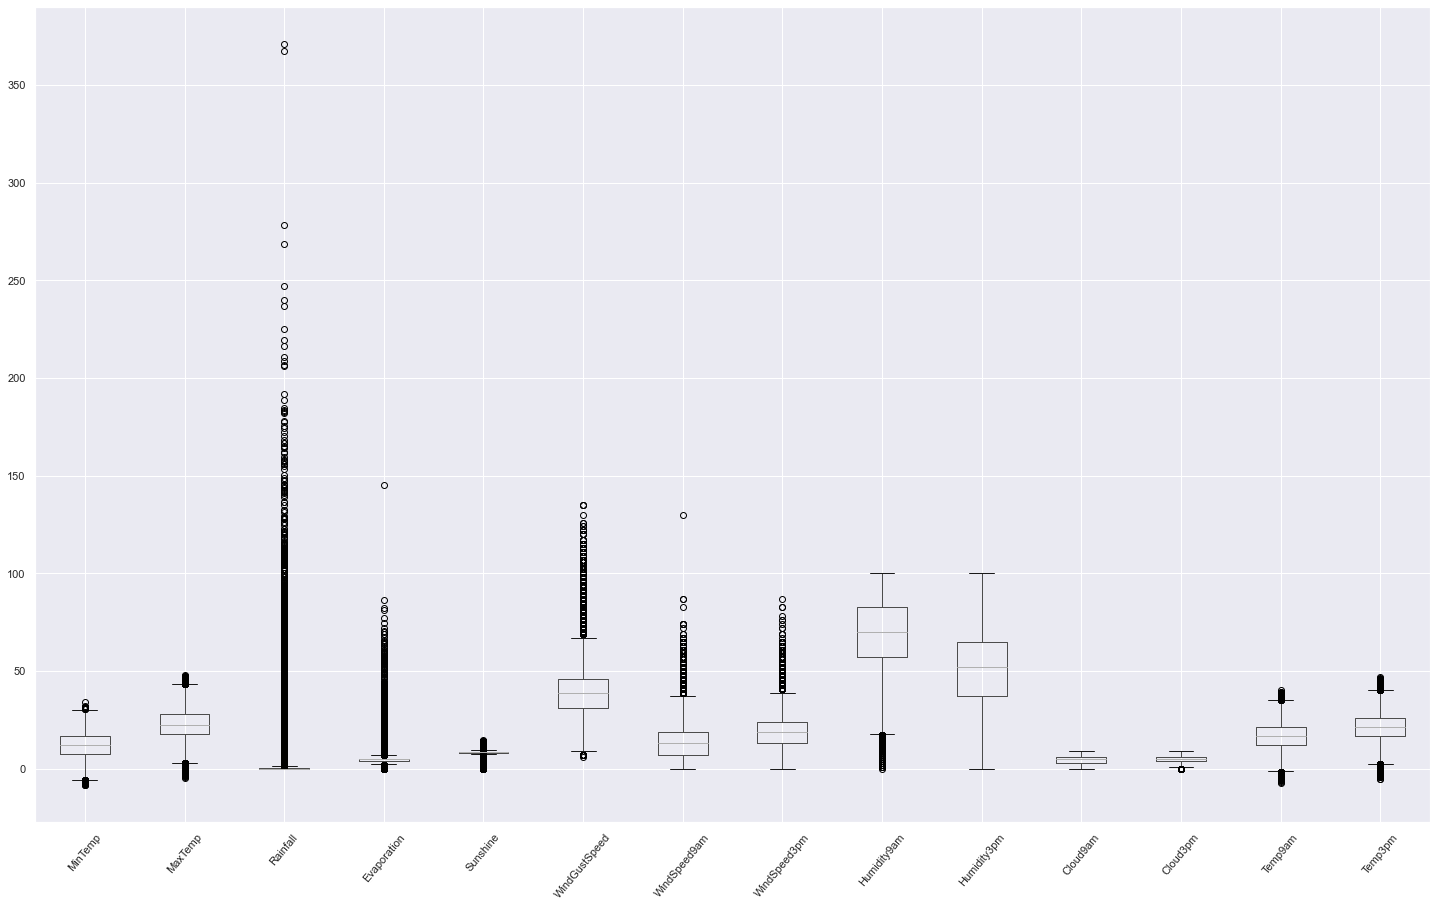

In [23]:
#outliers
plt.figure(figsize=[25,15])
df.boxplot(column= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 
                    'Cloud3pm', 'Temp9am', 'Temp3pm'])
plt.xticks(rotation=50)
plt.show()

__Analysis:__ This graph shows all the boxplots for each columns. We can notice the outliers in each columns and the spread of them. 

__Treatment:__ We will treat the outliers by calculating the IQR and removing whatever lies outside of the spread.

In [24]:
#treating the outliers
threshold = 0.04
for col in df:
    if df[col].dtype=='float64':   
    # Lower and upper threshold
        lower_threshold = df[col].quantile(threshold)
        upper_threshold = df[col].quantile(1-threshold)
    
    # Dropping the values below lower threshold and beyond upper threshold
        df = df[(df[col]>=lower_threshold) & (df[col]<=upper_threshold)]

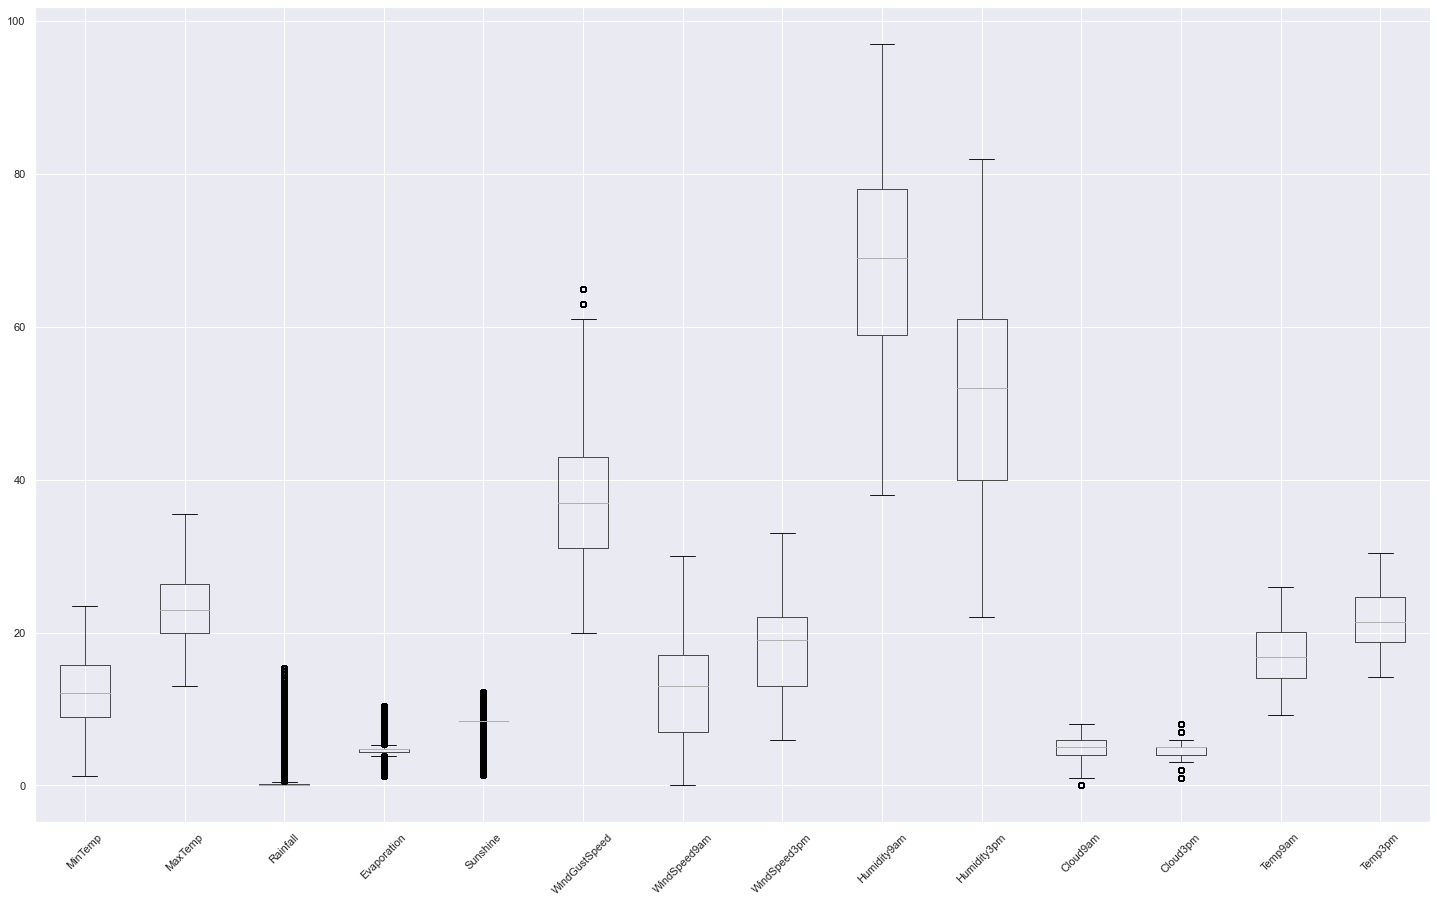

In [25]:
#Visualizing after treating the outliers
plt.figure(figsize=[25,15])
df.boxplot(column= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
                    'Temp9am', 'Temp3pm'])
plt.xticks(rotation=45)
plt.show()

__Analysis:__ The outliers have been treated but there are still a few, we won't remove them as they aren't much as before. 

In [26]:
print("Cleaned Data length: ",df.shape)
print("Original Data length: ",data.shape)

Cleaned Data length:  (52684, 23)
Original Data length:  (145460, 23)


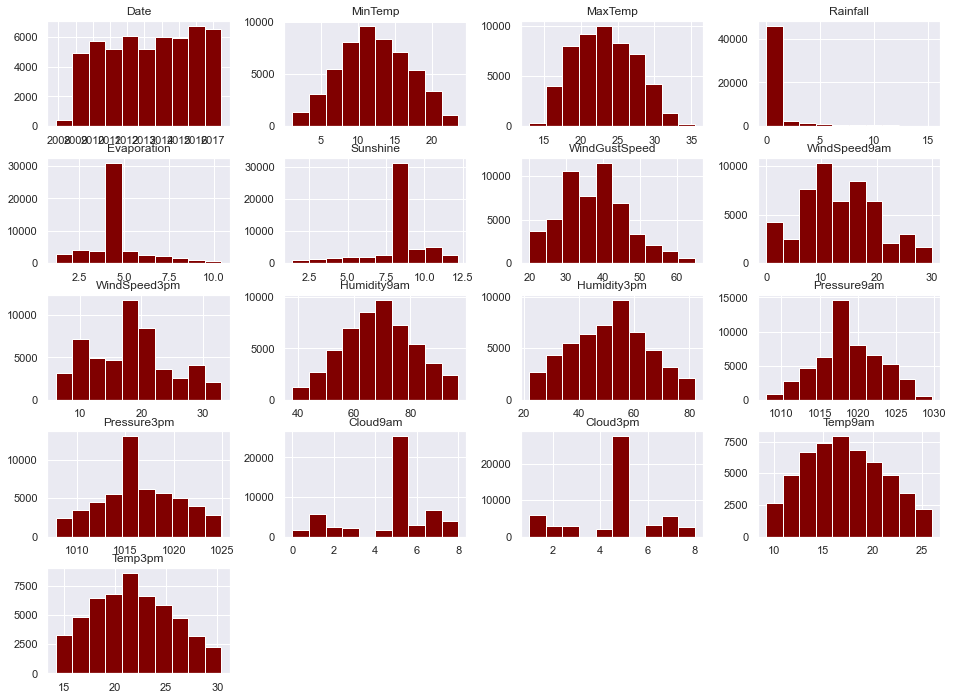

In [27]:
#Visualizing the column distribution of the cleaned data
df.hist(bins=10 ,figsize=(16,12), color = 'maroon')
plt.show()

__Analysis:__ As compared to before our columns are more normally distributed. Let's move on with the analysis.

Rain Today Value Count: 
 No     44253
Yes     8431
Name: RainToday, dtype: int64

Rain Tomorrow Value Count: 
 No     44774
Yes     7910
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

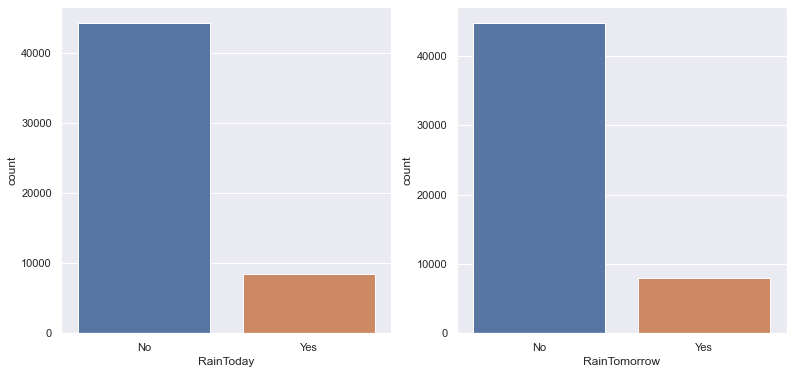

<Figure size 1368x1296 with 0 Axes>

In [28]:
#Understanding the Rain of cleaned data 
fig, ax =plt.subplots(1,2)
print("Rain Today Value Count: \n", df.RainToday.value_counts())
print("\nRain Tomorrow Value Count: \n",df.RainTomorrow.value_counts())

plt.figure(figsize=(19,18))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

__Analysis:__ We get the Rain Today and Tomorrow count. It shows how many times it rained today and tomorrow in the cleaned Dataset. We will have to convert the categorical variable to numerical for prediction.

In [29]:
#Converting into numerical
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

print(df['RainToday'].head(3))
print(df['RainTomorrow'].head(3))

1     0
10    0
14    0
Name: RainToday, dtype: int64
1     0
10    1
14    0
Name: RainTomorrow, dtype: int64


### Converting other columns to Numerical as well

In [30]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [31]:
# Dropping the features not required for model
df.drop(['Date'], axis = 1 ,inplace = True)

In [32]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
10,2,13.4,30.4,0.0,4.8,8.4,3,30.0,10,2,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,0,1
14,2,8.4,24.6,0.0,4.8,8.4,12,39.0,8,14,...,57.0,32.0,1009.7,1008.7,5.0,5.0,15.9,23.5,0,0


### Splitting into Train and Test Data

Target Varaible: RainTomorrow

In [33]:
# spliting training and testing data
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

print('x_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (36878, 21)
y_train shape is:  (36878,)
x_test shape is:  (15806, 21)
y_test shape is:  (15806,)


## Models

### Gaussian NB

In [34]:
#GaussianNB Model
model = GaussianNB()
model.fit(X_train, y_train) # Train the model on the training data
  
predicted = model.predict(X_test)  
#classification Report    
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print("\nF1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     13447
           1       0.36      0.40      0.38      2359

    accuracy                           0.81     15806
   macro avg       0.63      0.64      0.63     15806
weighted avg       0.81      0.81      0.81     15806

The accuracy of Gaussian Naive Bayes model is :  80.5896495001898 %

F1 score for Gaussian Naive Bayes is : 38.0952380952381 %


__Analysis:__ The Gaussian Naive Bayes is 80% accurate,the target variable for 80.59% of the instances in the test data.The F1-score for class 1 is 38.09%, which means that the model is less accurate in predicting the instances with the target value of 1.

We can check with other models as well to find the best accurate model.

### Linear Regression

In [35]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predicted = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, predicted)
print("The R-squared score of the linear regression model is:", r2)
mse = mse_(y_test, predicted)
print("Mean squared error: ", mse)

# Evaluate the model using RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

The R-squared score of the linear regression model is: 0.15608311848001366
Mean squared error:  0.10715416713564135
Root Mean Squared Error:  0.32734411119743906


__Analysis:__ The R-squared score of the linear regression model is a measure of how well the model fits the data. It ranges from 0 to 1, higher values is equals to better fit. Here the R-squared score is 0.156, which means that the model explains only 15.6% of the variability in the target variable.

The mean squared error (MSE) is a measure of the average squared difference between the predicted values and the actual values. A lower MSE always have better performance. In this case, the MSE is 0.107, meaning, the predicted values are about 0.107 units away from the actual values.

The root mean squared error (RMSE) is the square root of the MSE and is also a measure of the average difference between the predicted and actual values, but it is in the same units as the target variable. Here, the RMSE is 0.327, which means that, the predicted values are about 0.327 units away from the actual values.

### Logistic Regression

In [36]:
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)  
#liblinear is optimized for high dimensionality and can handle sparse input data. 

logreg.fit(X_train, y_train) # Fit the model
y_pred_test = logreg.predict(X_test) # Predict data points 

print(classification_report(y_test, y_pred_test))
# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 3)}%')
print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 3)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 3)}%')
print("F1 score for Logistic Regression model is :",f1_score(y_test, y_pred_test,)*100, "%")

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     13447
           1       0.60      0.16      0.25      2359

    accuracy                           0.86     15806
   macro avg       0.74      0.57      0.59     15806
weighted avg       0.83      0.86      0.82     15806

Model accuracy score: 85.879%
Training set score: 85.59%
Test set score: 85.879%
F1 score for Logistic Regression model is : 24.797843665768198 %


__Analysis:__ The Logistic model is better than the previous models as it is 86% accurate which is a high rate as compared to others. Even the Training and Testing Data has a similar accuracy.

We will analysis this model and check if it is good or no.

#### Cross Validation

In [37]:
#Cross Validation for logistic regression
from sklearn.model_selection import cross_validate
results = cross_validate(estimator = logreg,
                        X = X_train,
                        y = y_train,
                        cv = 9,
                        scoring = ['accuracy', 'precision', 'recall','f1'],
                        return_train_score = True)
results

{'fit_time': array([0.29321599, 0.27323055, 0.26528573, 0.27213573, 0.29092526,
        0.2677772 , 0.26422024, 0.26076984, 0.30709553]),
 'score_time': array([0.0070014 , 0.00801373, 0.00767326, 0.0065937 , 0.00654078,
        0.0070014 , 0.00700068, 0.00654531, 0.00654984]),
 'test_accuracy': array([0.85822352, 0.8545632 , 0.85407516, 0.85968765, 0.85383114,
        0.85111057, 0.85940932, 0.85403954, 0.85794484]),
 'train_accuracy': array([0.85567419, 0.85622331, 0.85640635, 0.85585723, 0.85649786,
        0.85668528, 0.85577011, 0.85644123, 0.8562887 ]),
 'test_precision': array([0.62      , 0.56603774, 0.56643357, 0.61797753, 0.55844156,
        0.51685393, 0.61764706, 0.55828221, 0.60869565]),
 'train_precision': array([0.57742182, 0.58506543, 0.58972332, 0.580945  , 0.58970359,
        0.58836689, 0.58143194, 0.58571429, 0.58636716]),
 'test_recall': array([0.15072934, 0.1458671 , 0.13128039, 0.17828201, 0.13938412,
        0.14935065, 0.17045455, 0.14748784, 0.15883306]),
 'tra

Text(0.5, 1.0, 'Accuracy Scores in 9 Folds')

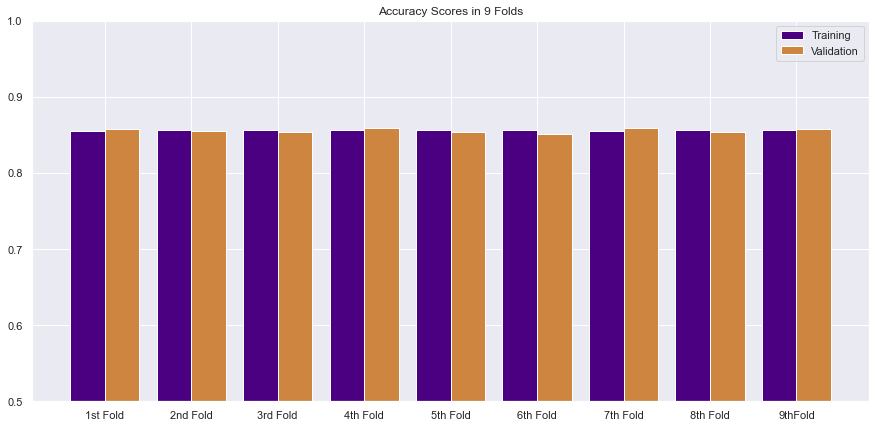

In [38]:
labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', '6th Fold', '7th Fold', '8th Fold', '9thFold']
x_axis = np.arange(len(labels))

plt.figure(figsize = (15, 7))
plt.bar(x_axis - 0.2, results['train_accuracy'], width = 0.4, color = 'indigo', label = 'Training')
plt.bar(x_axis + 0.2, results['test_accuracy'], width = 0.4, color = 'peru', label = 'Validation')
plt.xticks(x_axis,labels)
plt.ylim(0.5,1)
plt.legend()
plt.title('Accuracy Scores in 9 Folds')

__Analysis:__ The Accuracy Score of the Training and Validation is almost same throughout the 9 folds. This appears to be a good result as both Training and Validation is in the same range that is above 85% and almost similar.

### KNN

In [39]:
# Create a KNN model with k=5
model = KNeighborsClassifier(n_neighbors=5)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predicted = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predicted)
print(classification_report(y_test, predicted))
print("The accuracy of KNN model is : ", accuracy_score(y_test, predicted)*100, "%")
print("\nF1 score for KNN model is :",f1_score(y_test, predicted,)*100, "%")

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     13447
           1       0.49      0.21      0.29      2359

    accuracy                           0.85     15806
   macro avg       0.68      0.58      0.60     15806
weighted avg       0.82      0.85      0.82     15806

The accuracy of KNN model is :  85.01202075161332 %

F1 score for KNN model is : 29.093085902424427 %


__Analysis:__ The accuracy of KNN model with k=5 is equal to 85% which isn't better than Logistic Regression. Even the F1 score appears to be 29%

__We can check with k=9__

In [40]:
# Create a KNN model with k=9
model = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predicted = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predicted)
print(classification_report(y_test, predicted))
print("The accuracy of KNN model is : ", accuracy_score(y_test, predicted)*100, "%")
print("\nF1 score for KNN model is :",f1_score(y_test, predicted,)*100, "%")

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     13447
           1       0.56      0.16      0.25      2359

    accuracy                           0.86     15806
   macro avg       0.72      0.57      0.59     15806
weighted avg       0.82      0.86      0.82     15806

The accuracy of KNN model is :  85.60673162090346 %

F1 score for KNN model is : 25.33639645553003 %


__Analysis:__ The accuracy score has increased when the k is changed to 9, this shows that the KNN Model with k=9 is better than k=5. However, it isn't much better than Logistic Regression as the accuracy score is still less, 85.60%. Even the F1 score appears to be less, 25.33% but more than Logistic Regression

In [41]:
#Cross Validation for knn
from sklearn.model_selection import cross_validate
results = cross_validate(estimator = model,
                        X = X_train,
                        y = y_train,
                        cv = 9,
                        scoring = ['accuracy', 'precision', 'recall','f1'],
                        return_train_score = True)
results

{'fit_time': array([0.00982618, 0.00853062, 0.01053071, 0.01155353, 0.01629925,
        0.00852966, 0.00948954, 0.00874019, 0.00809836]),
 'score_time': array([0.42804432, 0.48482752, 0.48425674, 0.41928101, 0.47187829,
        0.4493258 , 0.42897844, 0.43998194, 0.43915296]),
 'test_accuracy': array([0.85407516, 0.8545632 , 0.8613958 , 0.85700342, 0.84968277,
        0.85086649, 0.85696851, 0.85062241, 0.85037833]),
 'train_accuracy': array([0.87062233, 0.87034777, 0.869036  , 0.8709579 , 0.87181208,
        0.87114487, 0.8701687 , 0.87181599, 0.87257863]),
 'test_precision': array([0.55491329, 0.55614973, 0.63535912, 0.58031088, 0.50306748,
        0.51231527, 0.57425743, 0.51461988, 0.51086957]),
 'train_precision': array([0.72      , 0.71268657, 0.69698832, 0.71568627, 0.71968788,
        0.72232645, 0.71665603, 0.72426471, 0.74092934]),
 'test_recall': array([0.15559157, 0.16855754, 0.18638574, 0.1815235 , 0.13290113,
        0.16883117, 0.18831169, 0.14262561, 0.15235008]),
 'tra

In [42]:
labels = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', '6th Fold', '7th Fold', '8th Fold', '9thFold']
x_axis = np.arange(len(labels))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Text(0.5, 1.0, 'Accuracy Scores in 9 Folds')

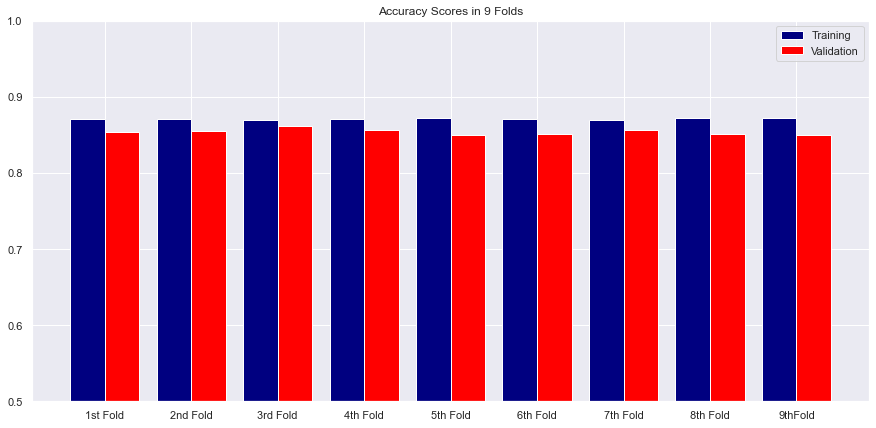

In [43]:
plt.figure(figsize = (15, 7))
plt.bar(x_axis - 0.2, results['train_accuracy'], width = 0.4, color = 'navy', label = 'Training')
plt.bar(x_axis + 0.2, results['test_accuracy'], width = 0.4, color = 'red', label = 'Validation')
plt.xticks(x_axis,labels)
plt.ylim(0.5,1)
plt.legend()
plt.title('Accuracy Scores in 9 Folds')

__Analysis:__ They Accuracy Scores through the 9 folds appears to be in the range of 85-90 %. The Training Accuracy has always been higher than the validation accuracy score. 

As compared to the logistic regression model, the accuracy score of both training and validation of KNN don't match and have a bigger difference than the one in the logistic regression.

### Conclusion:

We have analysed the dataset and have gone through all the columns. We have found the correlation between the columns and the rainfall column. We have even treated the missing values and the outliers. The categorical variables were converted to numerical to fit the models.

Once all this was done, we then divided the data into training and test dataset. For models we used __Gaussian Naive Bayes, Linear Regression, Logistic Regression__ and __KNN__. We have even cross validated the models and checked their accuracy through 5 or 9 folds.

- Gaussian Naive Bayes had an accuracy of 81%, 
- Linear Regression was fit but the R squared isn't high enough and the mean sqaure error was't quite less.
- Logistic Regression had 86% 
- KNN had 85%

With the accuracy score we can conclude that the __Logistic Regression is the most fit model__ for this.

## Thank You!